In [1]:

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import model_selection, naive_bayes, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import itertools


import pickle
# data = pd.read_csv(
#     'data/student_evaluation.csv',
#     dtype={'Sentiment': object})
# unique = data.Sentiment.unique()
# print(unique)
# data['Sentiment'].value_counts().plot(kind="bar")
# plt.show()

# # train/test data split
# train, test = train_test_split(data, test_size=0.2)

In [2]:
# import numpy as np
# import matplotlib.pyplot as plt
# data = [[30, 25, 50, 20],
# [40, 23, 51, 17],
# [35, 22, 45, 19]]
# X = np.arange(4)
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
# ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
# ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
 
# # Fake dataset
# height = [3, 12, 5, 18, 45]
# bars = ('A', 'B', 'C', 'D', 'E')
# y_pos = np.arange(len(bars))
 
# # Create bars and choose color
# plt.bar(y_pos, height, hatch = "/", color = (0.5,0.5,0.5,0.5))
 
# # Add title and axis names
# plt.title('My title')
# plt.xlabel('categories')
# plt.ylabel('values')
 
# # Limits for the Y axis
# plt.ylim(0,60)
 
# # Create names
# plt.xticks(y_pos, bars)
 
# # Show graphic
# plt.show()


Sentiment: ['positive' 'neutral']
neutral     335
positive    306
Name: Sentiment, dtype: int64


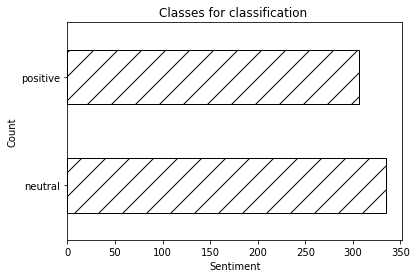

In [4]:
Corpus = pd.read_csv(r"data/student_evaluation.csv",encoding='latin-1')
# Corpus.head()
print("Sentiment:" , Corpus.Sentiment.unique())
print (Corpus['Sentiment'].value_counts())
Corpus['Sentiment'].value_counts().plot(kind='barh',color= 'white',edgecolor='black', hatch="/")

plt.title('Classes for classification ')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
# plt.figure()

Sentiment: ['positive' 'neutral']
neutral     335
positive    306
Name: Sentiment, dtype: int64


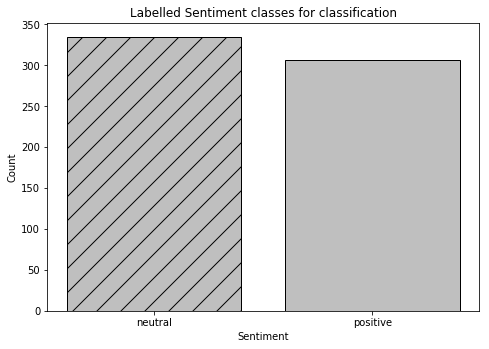

In [5]:
Corpus = pd.read_csv(r"data/student_evaluation.csv",encoding='latin-1')
# Corpus.head()
print("Sentiment:" , Corpus.Sentiment.unique())
print (Corpus['Sentiment'].value_counts())

a = []
a = Corpus['Sentiment'].value_counts()
# print(a[0],a[1])

x = []
x = Corpus.Sentiment.unique()
X = x[0] 
Y = x[1]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Y, a[0], color = (0.5,0.5,0.5,0.5) ,edgecolor='black', hatch="/")
ax.bar(X, a[1], color = (0.5,0.5,0.5,0.5) ,edgecolor='black')
# ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)


plt.title('Labelled Sentiment classes for classification')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
# plt.figure()

In [6]:
# https://medium.com/@annabiancajones/sentiment-analysis-on-reviews-train-test-split-bootstrapping-cross-validation-word-clouds-4ae65e745f59

# convert to numeric values
Corpus['Sentiment'] = Corpus.Sentiment.map(lambda x: int(0) if x =='positive' else int(1) if x =='neutral' else np.nan)
print (Corpus['Sentiment'].value_counts())
Corpus.head()

1    335
0    306
Name: Sentiment, dtype: int64


,comment,suggestion,Sentiment
0,This is one of the beginner and best course in...,NO,0
1,i would like to include the advance version of...,CS,1
2,It is an excellent course for Phd students as ...,NO,0
3,Presenting two papers 1 mid exam + 1 project a...,NO,0
4,I really learn a lot from this course which wi...,NO,0


In [7]:
# Step - a : Remove blank rows if any.
Corpus['comment'].dropna(inplace=True)

# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
Corpus['comment'] = [entry.lower() for entry in Corpus['comment']]

# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['comment']= [word_tokenize(entry) for entry in Corpus['comment']]

# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['comment']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)

# print(Final_words)
# Corpus['text_final']

In [11]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['Sentiment'],test_size=0.2)

Corpus['Sentiment'].value_counts()
# Corpus['text_final'].value_counts()

1    335
0    306
Name: Sentiment, dtype: int64

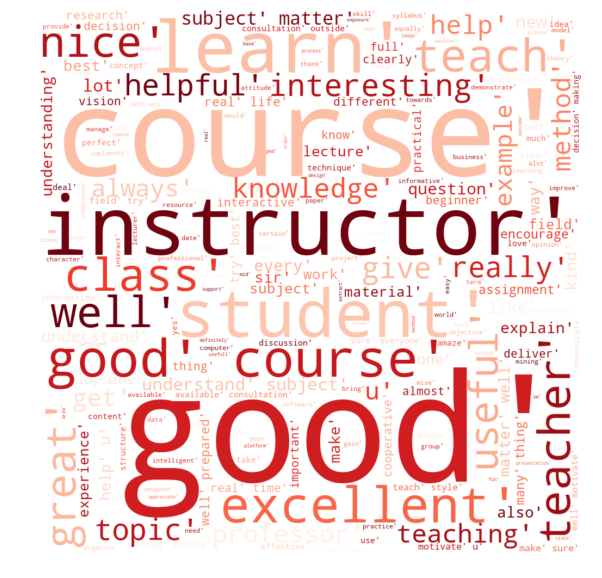

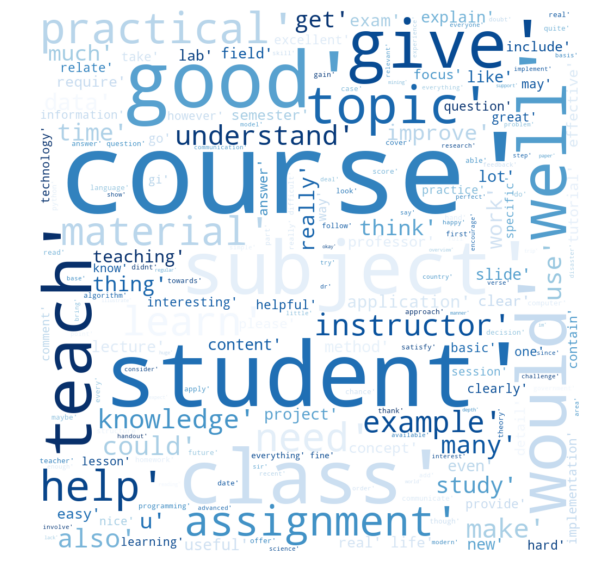

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Polarity == 0 positve
train_s0 = Corpus[Corpus.Sentiment ==0]
all_text = ''.join(word for word in train_s0.text_final)
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


# Polarity == 1 neutral
train_s1 = Corpus[Corpus.Sentiment == 1]
all_text = ' '.join(word for word in train_s1.text_final)
wordcloud = WordCloud(width=1000, height=1000, colormap='Blues', background_color='white', mode='RGBA').generate(all_text)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


# # Polarity == 2 positive
# train_s2 = training_bs[training_bs.sentiment ==2]
# all_text = ' '.join(word for word in train_s2.lem_words)
# wordcloud_p2 = WordCloud(width=1000, height=1000, colormap='Wistia',background_color='white', mode='RGBA').generate(all_text)
# plt.figure(figsize=(20,10))
# plt.imshow(wordcloud_p2, interpolation='bilinear')
# plt.axis("off")
# plt.margins(x=0, y=0)
# plt.show()